# Isostasy and elasticity of the Earth's lithosphere
## Exercises on crustal isostasy

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   3rd of January 2024

## Exercise 2: Isostasy and elasticity in orogenic plateaus

The build-up of large orogenic plateaus, such as Tibet or the Central Andeas, is the result of the convergence between tectonic plates. Over time-scales of million years, crustal material is squeezed horizontally in the process of tectonic subduction, and therefore accumulates (i.e., builds up) vertically. Bellow (or in the exercise paper) you will find two figures that show the elevation and satellite-measured free-air gravity anomaly of the Tibetan Plateau area.

Perform the following exercises:

1. Select a point in the middle of the Tibetan Plateau where the free-air gravity anomaly is close to zero, but not exactly zero. Make a theoretical prediction of the thickness of its roots, assuming fully isostatic conditions (i.e., no elasticity), a crustal density of $2700$ $kg/m^3$, a mantle density of $3300$ $kg/m^3$, and a standard crust of thickness $35$ $km$. 

2. Consider now the scenario where isostatic equilibrium is not achieved by a buoyant root (Airy compensation), but rather a mass deficit in the mountains and crust itself, i.e. the Tibet and the crust beneath are much lighter than regular crust. What would have to be the density in this case? Assume a full depth of compensation ($W = 35 km$). Is that density value reasonable, or even plausible for rocks? (for reference: $\rho_{granite} = 2600$ $kg/m^3$, $\rho_{shale} = 2500$ $kg/m^3$, $\rho_{sediments} = 2000$ $kg/m^3$)

3. Consider now the possibility that the Tibetan Plateau is not isostatically compensated, but rather supported by the elastic strength of the lithosphere. What would have to be the elastic thickness of the lithosphere in this case? Estimate this for a support going North-South (its widest) and East-West (its narrowest). Is that value within the range of know lithospheric thicknesses? Even if it is not, what qualitative implication does this near-zero gravity anomaly have on the mantle?


Notes: 

- The thickness of the roots as a function of gravity anomaly is given by:

$$ h_r = \frac{1}{(\rho_m - \rho_c)} \cdot \left[ \rho_c h_m - \frac{\Delta g}{2 \pi G} \right] $$

where $\rho_m$ is the density of the mantle, $\rho_c$ is the density of the crust, $h_m$ is the height of the mountains, $\Delta g$ is the free-air gravity anomaly, and $G$ is the gravitational constant.

- The Pratt compensation density as a function of depth of compensation is given by:

$$\rho_{c2} = \rho_c \left( \frac{W}{W+h_m} \right)$$

where $\rho_{c2}$ is the density of the mountains/crust, $\rho_c$ is the density of the reference crust, $W$ is the depth of compensation, and $h_m$ is the height of the mountains.

In [1]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_SCRIPTS = '/content/gdrive/MyDrive/2024-Geodynamics/01_ISOSTASY_ELASTICITY/SCRIPTS'


# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)

from map_dependencies import *
from figure_dependencies import create_figure

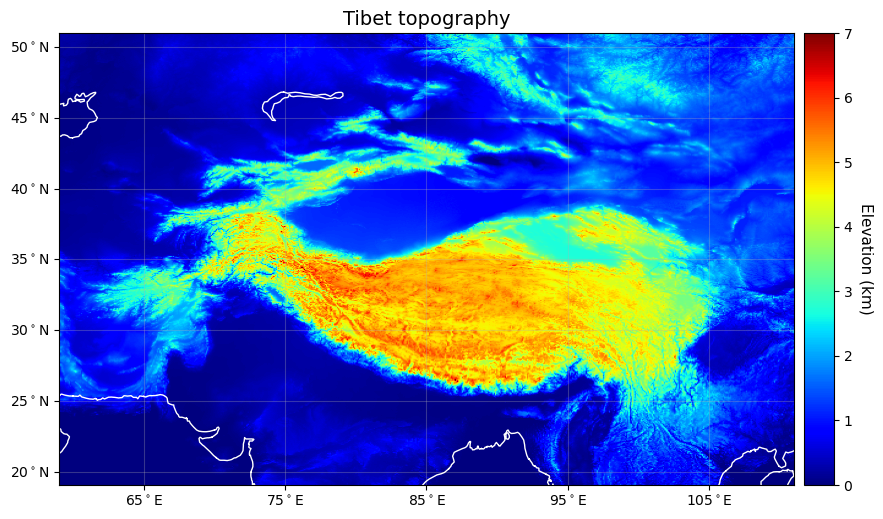

In [3]:
fig1, ax1 = create_figure(figsize=(10,10))
add_topography(fig1, ax1,
               mountain="TIBET",
               colormap="jet",
               map_range=[0, 7])


add_coastlines(fig1, ax1, line_color='white')
ax1.set_title("Tibet topography", fontsize=14);

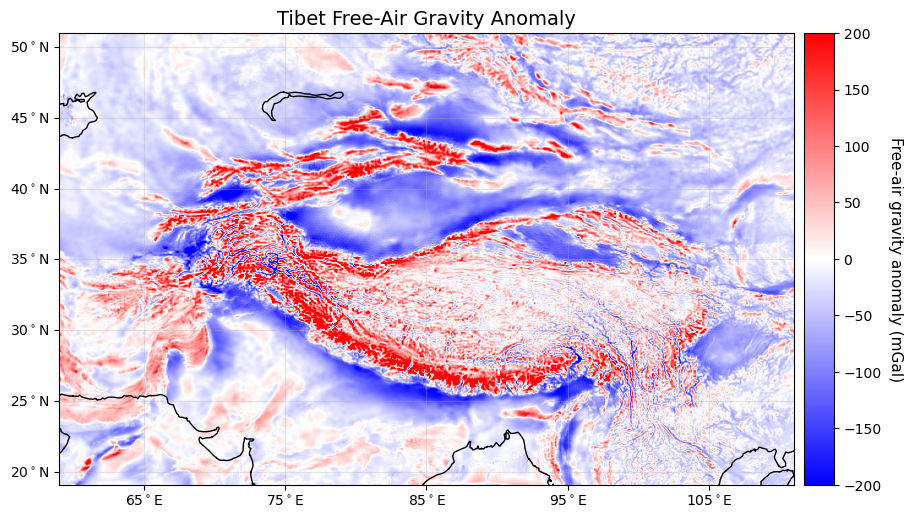

In [4]:
fig2, ax2 = create_figure(figsize=(10,10))
add_gravity(fig2, ax2,
            mountain="TIBET",
            colormap="bwr", 
            map_range=[-200, 200])


add_coastlines(fig2, ax2, line_color='black')
ax2.set_title("Tibet Free-Air Gravity Anomaly", fontsize=14);

# The "bwr" colormap enhances the contrast between the positive and negative anomalies. 
# To enhance differences within the positive and negative ranges you can experiment with other color gradient, e.g. "gist_rainbow".
# Available colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

We start by selecting a point somewhere in the middle of the Tibetan Plateau. We will use a point located at coordinates (91.0°E, 32.0°N), which shows a free-air gravity anomaly of about 25.0 mGal (light red shade).

You can add this point to any of the above maps by calling the `scatter()` function on the particular Axes object (`ax1` for the topographic map and `ax2` for the gravity anomaly one). Then, you call the respective Figure object to re-plot it. Beware that re-running the cell below will keep adding new points to the map. For a fresh start, you need to re-run the cell above where the map is originally created with `create_figure()`.

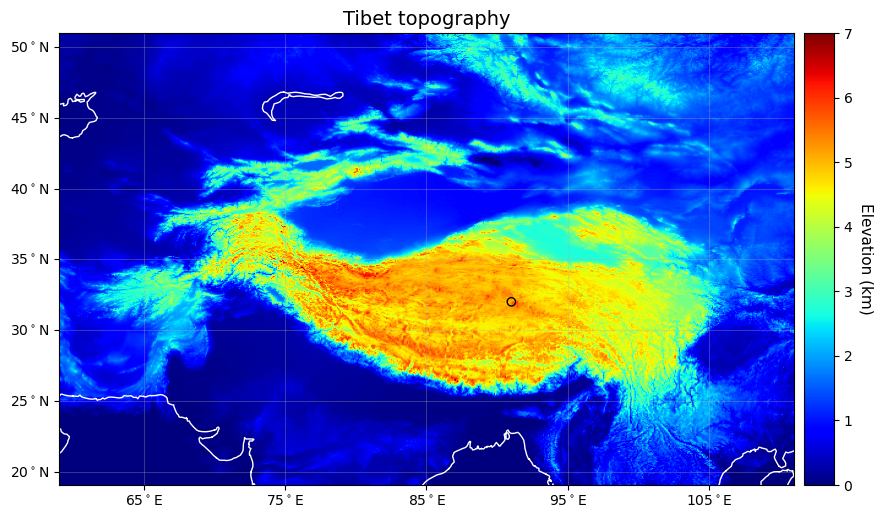

In [5]:
ax1.scatter(x=91, y=32, facecolor='none', edgecolor='black')
fig1

Eye-balling we say that our selected point is located at a height of 5000 m above sea level.

### Airy compensation

We can now calculate the theoretical thickness of the crustal roots ($h_{r}$) by using the equation:

$$ h_r = \frac{1}{(\rho_m - \rho_c)} \cdot \left[ \rho_c h_m - \frac{\Delta g}{2 \pi G} \right] $$

where $\rho_m$ is the density of the mantle, $\rho_c$ is the density of the crust, $h_m$ is the height of the mountains, $\Delta g$ is the free-air gravity anomaly, and $G$ is the gravitational constant.

In [11]:
h_m = 5000.0     # Put the height of the mountains for the selected point! Make sure to use SI units (meters).
d_grav = 25e-5  # Put the gravity anomaly for the selected point! Make sure to use SI units (m/s^2).

rho_m = 3300.0  # Density of the mantle [kg/m3]
rho_c = 2700.0  # Density of the crust [kg/m3]


def thickness_roots(d_grav, rho_m, rho_c, h_m):
    """ Calculates the thickness of the root in meteres.
    Based on Bouguer disk equation, only for wide plateaus. """
    
    G = 6.67e-11  # Gravitational constant [N*kg-2*m2]
    h_r = (rho_c * h_m - (d_grav/(2*np.pi*G))) / (rho_m - rho_c)
    return h_r


# Thickness of the roots [m]
h_r = thickness_roots(d_grav, rho_m, rho_c, h_m)   
print(f"Thickness of the roots: {h_r/1e3:.2f} km")

Thickness of the roots: 19.26 km


How sensible is this calculation to your choice of gravity anomaly? What would be the thickness if the gravity anomaly was zero, or slightly negative? 

What about the influence of your chosen height of the mountains? What is the range of possible values for the thickness of the crustal roots, giving your pick an uncertainty of  $\pm$ 500 meters?

### Pratt compensation

We have been asked to calculate the theoretical density of the mountains/crust in order to achieve a full Pratt compensation of the Tibetan Plateau, i.e. without roots. We can do this by using the equation:

$$\rho_{c2} = \rho_c \left( \frac{W}{W+h_m} \right)$$

where $\rho_{c2}$ is the density of the mountains/crust, $\rho_c$ is the density of the reference crust, $W$ is the depth of compensation, and $h_m$ is the height of the mountains.

In [12]:
h_m = 5e3   # Put the height of the mountains for the selected point! Make sure to use SI units (meters).
W = 35e3     # Put the given depth of compensation! Make sure to use SI units (meters).

# Density of the compensated crust [kg/m3]
rho_c2 = 2700 * (W / (W + h_m)) 
print(f"Density of the compensated crust: {rho_c2:.2f} kg/m3")

Density of the compensated crust: 2362.50 kg/m3


This values represents the minimum density contrast required to achieve a full Pratt compensation. This density value could be higher if we allowed for a partial compensation of roots. It could also be lower if we allowed for a partial density compensation of the crust itself ($W < 35 km$). 

If you were told that the top 800 meters of the plateau is made of sediments with a density of 2200 kg/m3, and the rest is regular continental crust: What would have to be the thickness of the roots? What approach (of the multiple seen in the lecture) would you use?

### Elastic support

You will need to know the horizontal extent of the Tibetan Plateau in order to calculate the elastic support. You can get a rough estimate from the map above, but bear in mind that distances are distorted in the map's rectangular projection. 

Alternatively, you can use the `geodesic_distance()` function (from the `map_dependencies` module) to calculate the distance between two points on the Earth's surface. This function takes as input the coordinates of the two points (in degrees) and returns the distance between them (in meters). 

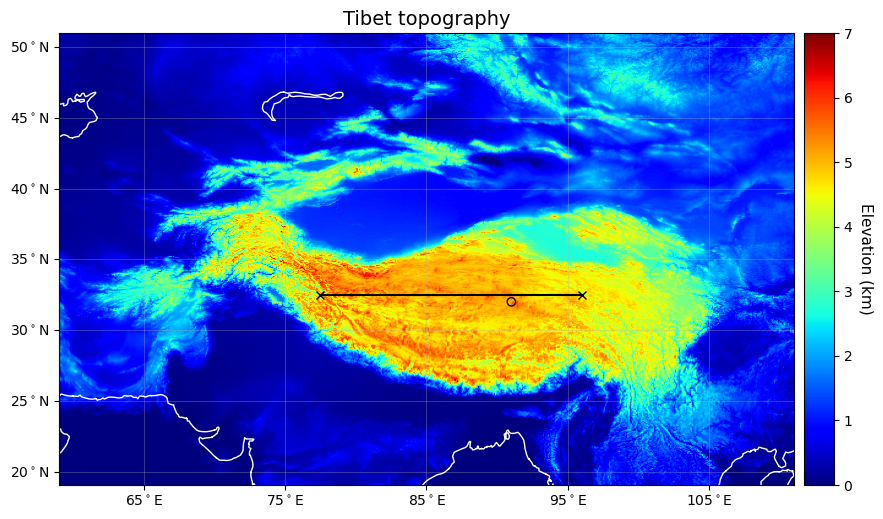

In [13]:
# You can test the position of your selected longitudes and latitudes by plotting them on the map.

# East-West profile
ax1.plot([77.5, 96.0],  # longitudes
         [32.5, 32.5],  # latitudes
         marker = 'x',
         linestyle = '-',
         color = 'k')  # you can compact the above to simply 'x-k' 

# North-South profile
ax1.plot([0.0], [0.0], 'x-k')     # Fill with your own pair of coordinates!
fig1

In [14]:
# East-West profile
point1_lon = 77.5
point1_lat = 32.5
point2_lon = 96.0
point2_lat = 32.5
distance = geodesic_distance(point1_lon, point1_lat, point2_lon, point2_lat)
print(f"Geodesic distance: {distance/1e3:.2f} km")

Geodesic distance: 1732.75 km


c:\Users\nbt571\Documents\PhD\Teaching\2024-Geodynamics\GSES-VSEF\SCRIPTS\DEPENDENCIES\ELASTIC_BENDING_DEGREE.py:130: RuntimeWarning: divide by zero encountered in divide
  A = D / (rho_c * g) * (2 * np.pi / wl)**4


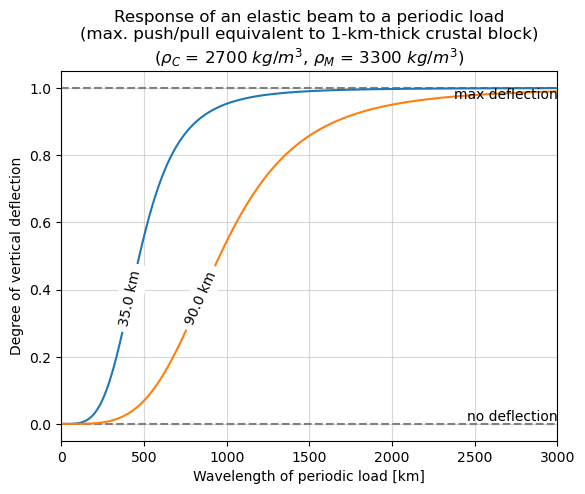

In [15]:
from ELASTIC_BENDING_DEGREE import plot_elastic_bending_degree

elastic_thickness_values = [35e3, 90e3]    # Try different values for the elastic thickness [m]
fig3, ax3 = plot_elastic_bending_degree(elastic_thickness_values)

We are looking for a value of `elastic_thickness` that will yield near-zero degree of vertical deflection for a wavelength of load comparable to the horizontal extent of the plateau. You can try higher values and get a rough idea of the necessary order of thickness. 

In [ ]:
ax3.fill_between([700, 1700], [0.0, 0.0], [1.0, 1.0], color='green', alpha=0.2, label="Tibet range of\nhorizontal extension")
ax3.legend(bbox_to_anchor=(1.01, 1.0))
fig3

Did you arrive at a reasonable value for the elastic thickness of the crust? Know that the elastic thickness of the lithosphere is am imaginary value and not something one can measure directly (like the Moho). So even if plates can reach a couple of hundred kilometers, the elastic thickness is usually much smaller (tens of kilometers).

The average thickness of the lithosphere is about 35 km. Can you estimate from the figure above what is the maximum load extension that the lithosphere can fully support?